In [1]:
#import QSIM #imports all submodules
from QSIM import * #imports all functions and classes

# Definir PSR Inicial

In [33]:
#basic landmarks
zero=landmark_value("0",0)
inf=landmark_value("inf",1,is_finite=False)
neg_inf=landmark_value("-inf",-1,is_finite=False)

one=landmark_value("1",Sign(1))

#####  Variables=[t,dt,x,vx,ax], also [vx_squared,KE, PE, E]

#time
t0=landmark_value("t0",0)
t_qs=quantity_space("t",[t0,inf])

qv_t0=qualitative_value(t0,Sign(1))


qv_t0_none_sign=qualitative_value(t0,Sign(None))

#x
x0=landmark_value("x0",1)
x_qs=quantity_space("x",[neg_inf,zero,x0,inf])

qv_x0=qualitative_value(x0,Sign(None))


#vx
vx0=landmark_value("vx0",1)
vx_qs=quantity_space("vx",[neg_inf,zero,inf])

#qv_vx0=qualitative_value(vx0,Sign(None))


#ax
#ax0=landmark_value("ax0",-1)
#qv_ax0=qualitative_value(ax0,Sign(None))
ax_qs=quantity_space("ax",[neg_inf,zero,inf])



#kinetic energy
#KE0=landmark_value("KE0",1,is_finite=True)
KE_qs=quantity_space("K",[zero,inf])

#potential energy
#U0=landmark_value("U0",1,is_finite=True)
PE_qs=quantity_space("U",[zero,inf])

#energy
E0=landmark_value("E0",1,is_finite=True)
E_qs=quantity_space("E",[zero,E0,inf])

#add dt as a variable

dt_qs=quantity_space(variable="dt",landmarks_list=[zero,one])
dt_qs.set_maximum_limit(one)
dt_qs.set_minimum_limit(zero)


KE_qs.set_minimum_limit(zero)
PE_qs.set_minimum_limit(zero)
E_qs.set_minimum_limit(zero)



#Constraints
dt_x_vx=Derivative(quantity_spaces=[x_qs,vx_qs])
dt_vx_ax=Derivative(quantity_spaces=[vx_qs,ax_qs])
mminus_ax_x=Minus([ax_qs,x_qs])#M([ax_qs,x_qs],type=Sign(-1))


dt_t_dt=Derivative(quantity_spaces=[t_qs,dt_qs])
const_dt_pos=Constant(quantity_spaces=[dt_qs],current_value=one)

#mplus_vxsq_ke=M([vx_squared_qs,KE_qs],type=Sign(1))
uplus_vx_ke=U([vx_qs,KE_qs],type=Sign(1),a=zero,b=zero)
uplus_x_pe=U([x_qs,PE_qs],type=Sign(1),a=zero,b=zero)
#mplus_x_pe=M([x_qs,PE_qs],type=Sign(1))

add_ke_pe_E=Add([KE_qs,PE_qs,E_qs])
const_E=Constant([E_qs],current_value=E0)

all_q_spaces2=[t_qs,x_qs,vx_qs,ax_qs,dt_qs,KE_qs,PE_qs,E_qs] #,vx_squared_qs

Q2={}
for qs in all_q_spaces2:
    Q2[qs.variable]=qs

V2=[qs.variable for qs in all_q_spaces2]

C2=[dt_x_vx,dt_vx_ax,mminus_ax_x,dt_t_dt,const_dt_pos,uplus_x_pe,uplus_vx_ke,add_ke_pe_E,const_E] #mplus_vxsq_ke,mult_vx_vx_vxsquared


Dbar2={'t':qualitative_value(t0,None),'x':qv_x0,'vx':qualitative_value(zero,None)} #'vx_squared':qualitative_value(zero,None),
       #'ax':qv_ax0, 'K':qualitative_value(zero,None),'U':qualitative_value(U0,None),'E':qualitative_value(E0,None)} 
initial_conditions_state2=Qualitative_State(Dbar2)


Dbar_zero2={'t':qualitative_value(t0,None),'x':qualitative_value(zero,None),'vx':qualitative_value(zero,None)}#,'K':qualitative_value(None,None),'U':qualitative_value(zero,None), 'E':qualitative_value(zero,None)}
            #'ax':qualitative_value(zero,None), 'K':qualitative_value(None,None),'U':qualitative_value(zero,None),'E':qualitative_value(zero,None)}
initial_conditions_state02=Qualitative_State(Dbar_zero2)

In [34]:
V2,Q2,C2,initial_conditions_state2

(['t', 'x', 'vx', 'ax', 'dt', 'K', 'U', 'E'],
 {'t': t: t0 ... inf,
  'x': x: -inf ... 0 ... x0 ... inf,
  'vx': vx: -inf ... 0 ... inf,
  'ax': ax: -inf ... 0 ... inf,
  'dt': dt: 0 ... 1,
  'K': K: 0 ... inf,
  'U': U: 0 ... inf,
  'E': E: 0 ... E0 ... inf},
 [⟨ (d/dt x vx)⟩,
  ⟨ (d/dt vx ax)⟩,
  ⟨ (M- ax x)  (⟨-inf, dec⟩, ⟨inf, inc⟩), (⟨0, dec⟩, ⟨0, inc⟩), (⟨0, std⟩, ⟨0, std⟩), (⟨inf, std⟩, ⟨-inf, std⟩), (⟨inf, inc⟩, ⟨-inf, dec⟩), (⟨inf, dec⟩, ⟨-inf, inc⟩), (⟨-inf, std⟩, ⟨inf, std⟩), (⟨-inf, inc⟩, ⟨inf, dec⟩), (⟨0, inc⟩, ⟨0, dec⟩)⟩,
  ⟨ (d/dt t dt)⟩,
  ⟨ (const dt)⟩,
  ⟨ (U+_(0, 0) x U)⟩,
  ⟨ (U+_(0, 0) vx K)⟩,
  ⟨ ( ADD K U E)  (⟨0, inc⟩, ⟨0, dec⟩, ⟨0, std⟩), (⟨0, inc⟩, ⟨0, std⟩, ⟨0, inc⟩), (⟨0, inc⟩, ⟨0, dec⟩, ⟨0, dec⟩), (⟨0, dec⟩, ⟨0, inc⟩, ⟨0, std⟩), (⟨0, dec⟩, ⟨0, dec⟩, ⟨0, dec⟩), (⟨0, dec⟩, ⟨0, inc⟩, ⟨0, dec⟩), (⟨0, std⟩, ⟨0, dec⟩, ⟨0, dec⟩), (⟨0, inc⟩, ⟨0, dec⟩, ⟨0, inc⟩), (⟨0, inc⟩, ⟨0, inc⟩, ⟨0, inc⟩), (⟨0, dec⟩, ⟨0, inc⟩, ⟨0, inc⟩), (⟨0, dec⟩, ⟨0, std⟩, ⟨0, dec⟩), (⟨0, std

# Resovler PSR

In [35]:
from anytree import AsciiStyle, ContRoundStyle, ContStyle, DoubleStyle

qv_none_both=qualitative_value(None,None)
Trans_conditions=[False]

energy_root=QSIM(V2,Q2,C2,Trans_conditions,initial_conditions_state2,time_var="t",cycle_match_criteria="strong",max_breadth=3000,max_depth=10)

0


100%|██████████| 1/1 [00:00<00:00, 17.71it/s]


1


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


2


100%|██████████| 1/1 [00:00<00:00, 15.85it/s]


3


100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


4


100%|██████████| 1/1 [00:00<00:00, 10.62it/s]


5


100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


6


100%|██████████| 1/1 [00:00<00:00,  9.28it/s]


7


100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


8


0it [00:00, ?it/s]


In [44]:
#export tree to .txt for detailed view
with open("Tree_Outputs/02-Oscilador_Armonico_Simple_con_Energia_Conservada.txt","w") as f:
    for pre, fill, node in RenderTree(energy_root,style=ContRoundStyle()): 
        if node.name["cycle_loc"]==None:
            print(str(pre)+str(node.name["loc"])+":"+str({key: node.name["State"].get(key,qv_none_both) for key in V2})+" ",file=f) #make sure that dictionary is printed in the order of V
        else:
            print(str(pre)+str(node.name["loc"])+":"+str({key: node.name["State"].get(key,qv_none_both) for key in V2})+" -> "+str(node.name["cycle_loc"]),file=f)

In [37]:
#stationary initial state
qv_none_both=qualitative_value(None,None)
Trans_conditions=[False]
const_E_stationary=Constant([E_qs],current_value=zero)
stationary_energy_root=QSIM(V2,Q2,C2[:-1]+[const_E_stationary],Trans_conditions,initial_conditions_state02,time_var="t",cycle_match_criteria="strong",max_breadth=3000,max_depth=9)

0


100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


1


0it [00:00, ?it/s]


2


0it [00:00, ?it/s]


3


0it [00:00, ?it/s]


4


0it [00:00, ?it/s]


5


0it [00:00, ?it/s]


6


0it [00:00, ?it/s]


7


0it [00:00, ?it/s]


In [45]:
from anytree import AsciiStyle, ContRoundStyle, ContStyle, DoubleStyle
#export tree to .txt for detailed view
with open("Tree_Outputs/02-Oscilador_Armonico_Simple_con_Energia_Conservada_(Estacionario).txt","w") as f:
    for pre, fill, node in RenderTree(stationary_energy_root,style=ContRoundStyle()): 
        if node.name["cycle_loc"]==None:
            print(str(pre)+str(node.name["loc"])+":"+str({key: node.name["State"].get(key,qv_none_both) for key in V2})+" ",file=f) #make sure that dictionary is printed in the order of V
        else:
            print(str(pre)+str(node.name["loc"])+":"+str({key: node.name["State"].get(key,qv_none_both) for key in V2})+" -> "+str(node.name["cycle_loc"]),file=f)

In [41]:
from anytree.exporter import DictExporter #, JsonExporter, DotExporter
from anytree.importer import DictImporter
import pickle

exporter = DictExporter()
tree_dict=exporter.export(energy_root)
#exporter = JsonExporter(indent=2, sort_keys=True) #Object of type Derivative is not JSON serializable

with open('oscilador_armonico_simple_energia_conservada.pkl', 'wb') as f:
   pickle.dump(tree_dict, f)

# Graficar Soluciones del PSR

In [39]:
import networkx as nx
import hypernetx as hnx

constraint_name_translation_mapping={"Derivative":"Derivada","Constant":"Constante","Add":"Suma","Minus[-]":r"$M^-_0$","Plus[+]":r"$M^+_0$","U[+]":r"$U^+$","U[-]":r"$U^-$"}


def get_constraint_name(c):
    name=str(type(c)).split(".")[1]
    if isinstance(c,M) or isinstance(c,U):
        name+=str(c.type)

    new_name=name.replace("'>","")
    for key in constraint_name_translation_mapping:
        new_name=new_name.replace(key,constraint_name_translation_mapping[key])

    return new_name


def hypergraph_plot_from_C(C):
    data = {i: c.variables for i,c in enumerate(C)}
    labels={i: get_constraint_name(c) for i,c in enumerate(C)}
    H = hnx.Hypergraph(setsystem=data)
    hnx.draw(H,with_edge_counts=True,edge_labels=labels)


class HashableDict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


c:\ProgramData\Anaconda3\lib\site-packages\hypernetx\classes\entity.py:1387: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
c:\ProgramData\Anaconda3\lib\site-packages\hypernetx\classes\entity.py:1390: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties[self._misc_props_col] = self.properties[
c:\ProgramData\Anaconda3\lib\site-packages\hypernetx\classes\entity.py:1387: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
c:\ProgramData\Anaconda3\lib\site-packages\hypernetx\classes\entity.py:1390: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties[self._misc_props_col] = self.properties[


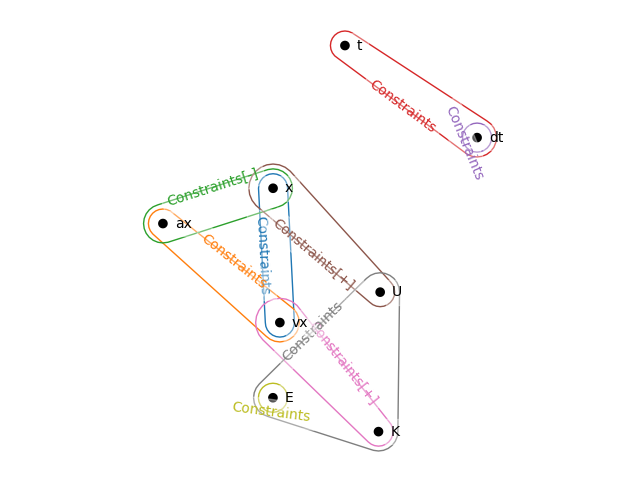

In [40]:
import random
import numpy as np
import matplotlib.pyplot as plt
data = {i: c.variables for i,c in enumerate(C2)}
labels={i: get_constraint_name(c) for i,c in enumerate(C2)}
H = hnx.Hypergraph(setsystem=data)

#for n in np.linspace(0.1,0.5,10):
# for n in np.arange(35,50,2):
# for n in random.choices(range(1, 101), k=10):
#     print(n)
#     fig, ax = plt.subplots(figsize=(8, 6)) #800x600
#     hnx.draw(H,with_edge_counts=True,with_color=True,edge_labels=labels,ax=ax,layout_kwargs={'seed': n,'k':0.5})
#     plt.show()

fig, ax = plt.subplots(figsize=(8, 6)) #800x600
hnx.draw(H,with_edge_counts=True,with_color=True,edge_labels=labels,ax=ax,layout_kwargs={'seed': 67,'iterations':50,'k':0.5})
#plt.savefig('Document Figures/4PSR_osc_arm_simp_energia.png',bbox_inches='tight', pad_inches=0)

In [42]:
stationary_behavior=get_behavior_from_leaf(stationary_energy_root.leaves[0],key=None)[1:]
#stationary_behavior=[Node(stationary_energy_root.leaves[0].name)]

normal_behaviors=[]
for leaf in energy_root.leaves:
    normal_behaviors.append(get_behavior_from_leaf(leaf,key=None)[1:])

all_behaviors=[stationary_behavior]+normal_behaviors

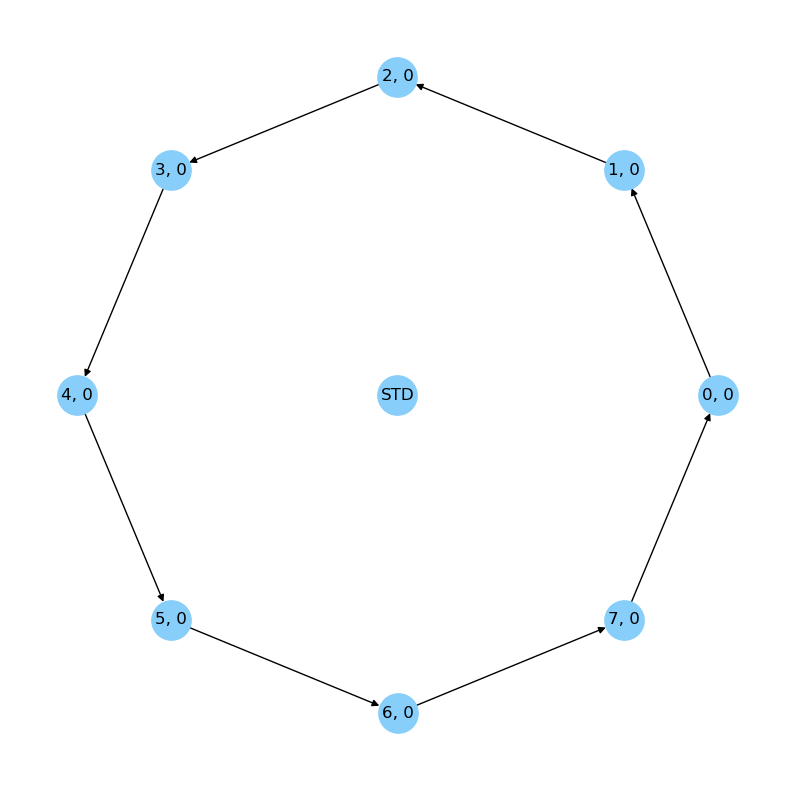

In [43]:
import pandas as pd
import numpy as np

G2 = nx.DiGraph()

data=[]
behavior_edges=[]
for i,behavior in enumerate(all_behaviors):
    for j,s in enumerate(behavior):
        state=HashableDict({key: s.name["State"].get(key,qv_none_both) for key in V2})
        q=s.name["Q"]
        loc=s.name["loc"]
        cycle_loc=s.name["cycle_loc"]
        data.append([i,state,q,loc,cycle_loc])
        
        if j>0:
            behavior_edges.append([data[-2][1],state]) #previous state,current state

data_df=pd.DataFrame(data,columns=["Behavior_No","State","Q","loc","cycle_loc"])

aux_df=data_df[data_df["Behavior_No"]!=0] 

behavior_nodes=aux_df.drop_duplicates(subset=["State"])["State"].to_list()
#add cycle edges
for index, row in aux_df.dropna(subset=["cycle_loc"])[["loc","cycle_loc"]].drop_duplicates().iterrows():
    loc1,loc2=row["loc"],row["cycle_loc"]
    state1=aux_df[aux_df["loc"]==loc1]["State"].iloc[-1]
    state2=aux_df[aux_df["loc"]==loc2]["State"].iloc[-1]
    behavior_edges.append([state1,state2])

G2.add_nodes_from(behavior_nodes)
G2.add_edges_from(behavior_edges)

#pos=nx.spectral_layout(G)
#pos=nx.shell_layout(G) #x
#pos=nx.random_layout(G)
pos=nx.circular_layout(G2) #x
#pos=nx.kamada_kawai_layout(G) #x
#pos=nx.planar_layout(G) #x
#pos=nx.spring_layout(G,center=(0,0),k=2)


labels = {}
for i,node in enumerate(G2.nodes()):
    labels[node] = data_df[data_df["State"]==node]["loc"].apply(lambda x: str(x).replace("(","").replace(")","")).iloc[0]

#change info for stationary behavior
stationary_state=HashableDict(stationary_behavior[0].name["State"])
G2.add_node(stationary_state)
pos[stationary_state]=np.array([0,0])
labels[stationary_state]="STD"

fig=plt.figure(figsize=(10,10))
#ax=fig.add_subplot(111)

# # Draw the graph in the first subplot
nx.draw_networkx(G2, with_labels=True,arrows=True,pos=pos,node_size=800,node_color="lightskyblue",labels=labels) #labels
plt.box(False)
plt.savefig('../Document Figures/4osc_arm_sim_energia_conservada_envisionment.png',bbox_inches='tight', pad_inches=0.075)
plt.show()